# Heart Disease Detection

In [ ]:
pip install pandas hvplot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import numpy as np
from scipy import stats

%matplotlib inline
sns.set_style("darkgrid")
plt.style.use("classic")


In [ ]:
#read data
data=pd.read_csv("/content/drive/MyDrive/heart (1).csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# data exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.shape

(1025, 14)

# count presence and absence of heart disease

In [ ]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in data.columns if feature not in continuous_features]

# Convert the identified features to object data type
data[features_to_convert] = data[features_to_convert].astype('object')

data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [ ]:
data.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,1025,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,1,0,2,1
freq,713,497,872,513,680,482,578,544,526


In [ ]:
data = data.rename(columns={'output': 'target'})

In [ ]:
data.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [ ]:
data.target.value_counts().hvplot.bar(title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count',width=400, height=300)

:Bars   [target]   (count)

# check messing values

In [ ]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [ ]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# count heart disease by sex

In [ ]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))


Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [ ]:
have_disease = data.loc[data['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4)
no_disease = data.loc[data['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4)

(no_disease * have_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [sex]   (count)
   .Bars.Count.II :Bars   [sex]   (count)

# heart disease by fbs

In [ ]:
have_disease = data.loc[data['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4)
no_disease = data.loc[data['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4)

(no_disease * have_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)',
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [fbs]   (count)
   .Bars.Count.II :Bars   [fbs]   (count)

# heart disease by chest pain

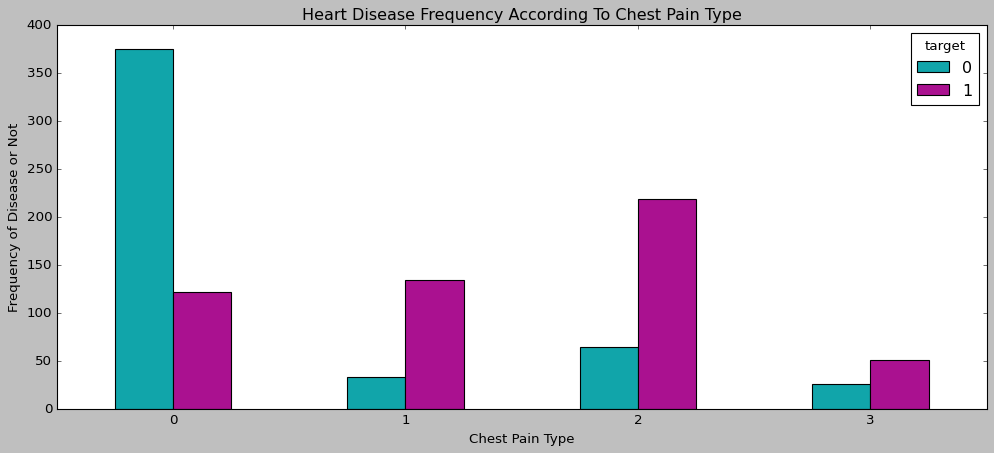

In [ ]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# heart disease by age

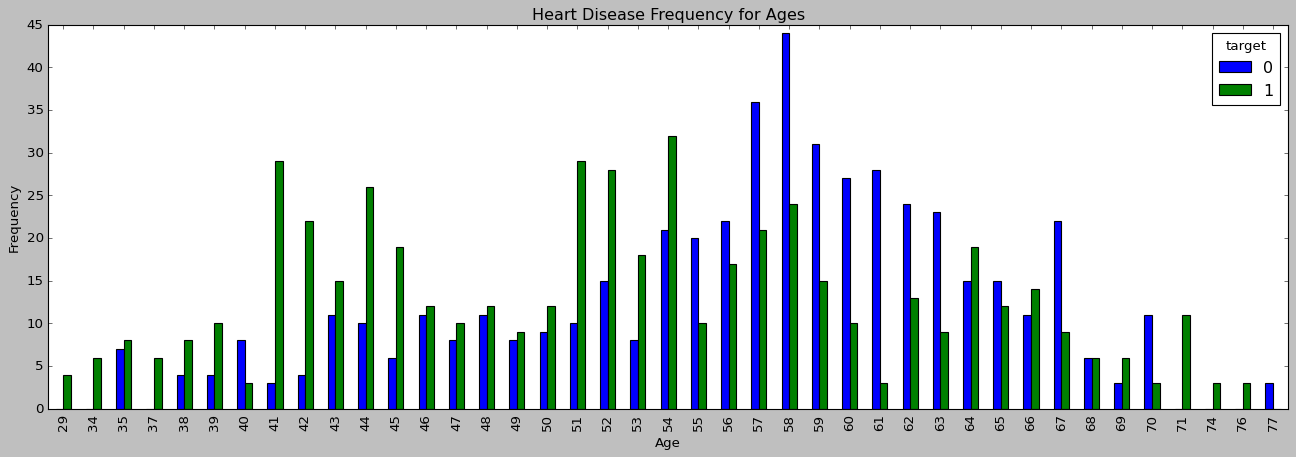

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

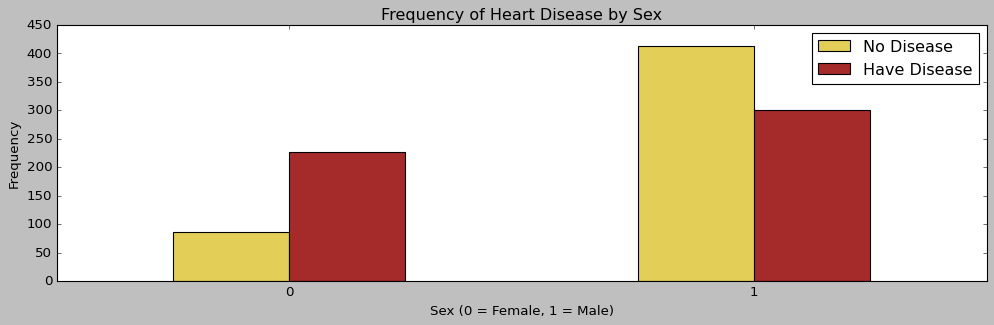

In [ ]:
#calculate frequency of heart disease by sex
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,4),color=['#E3CF57', "#A52A2A" ])
plt.title('Frequency of Heart Disease by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

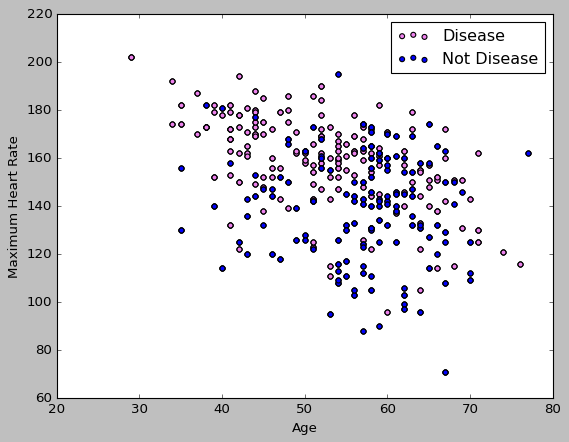

In [ ]:
#calculate frequency of heart disease by Maximum heart rate
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="violet")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# draw histogram

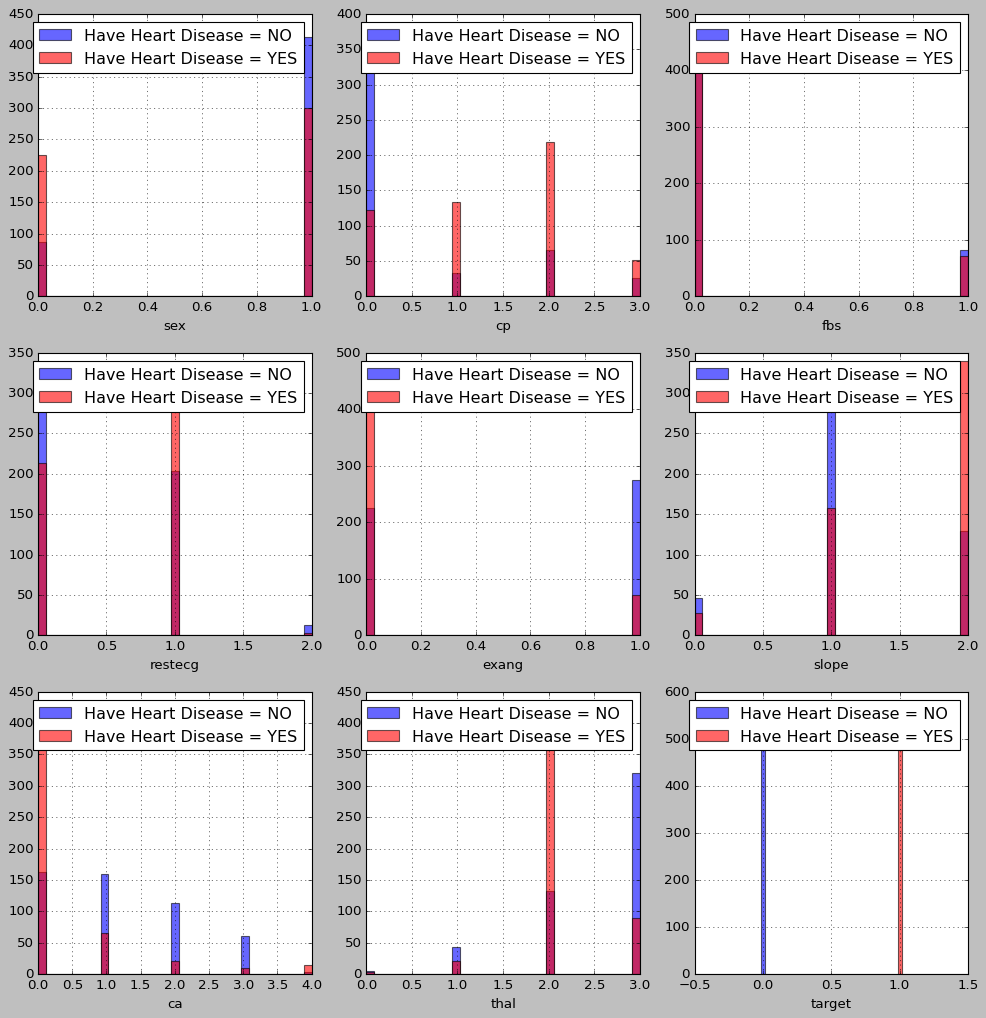

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

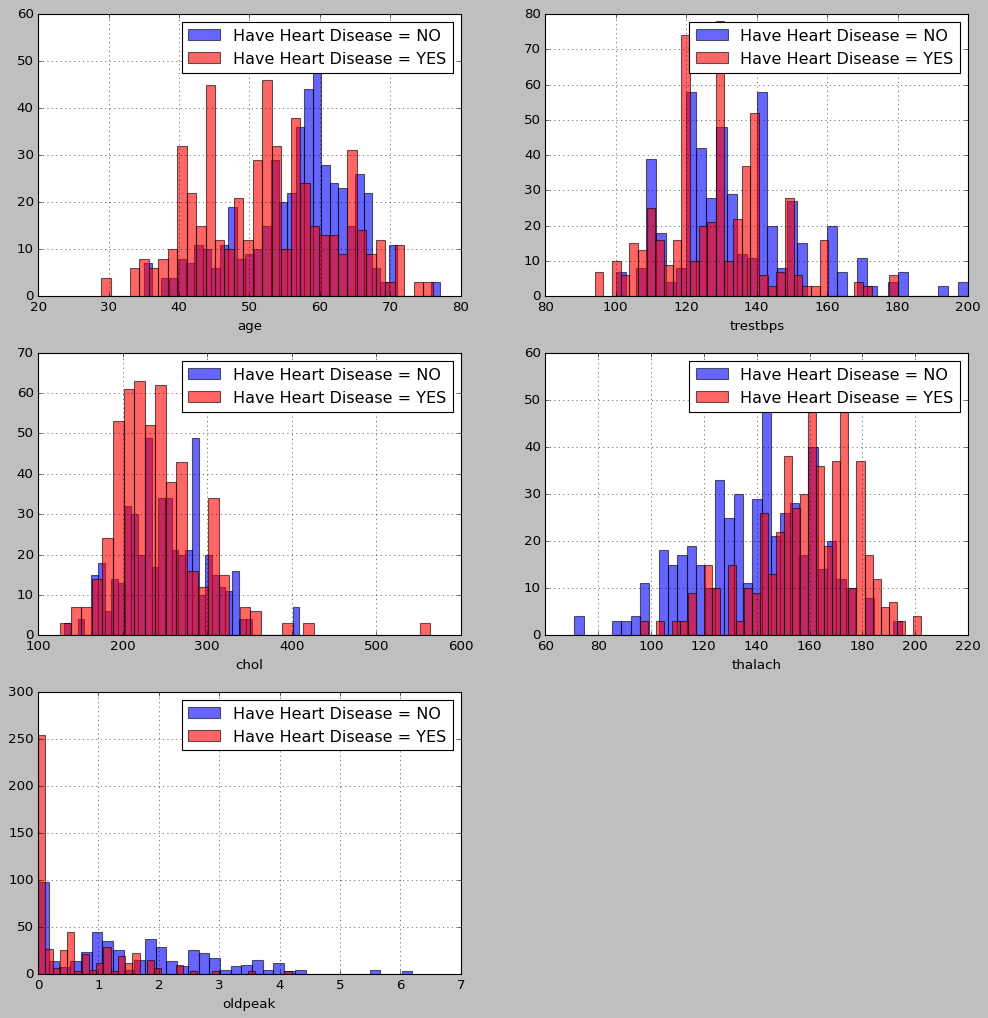

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**Numerical Variables Univariate Analysis**

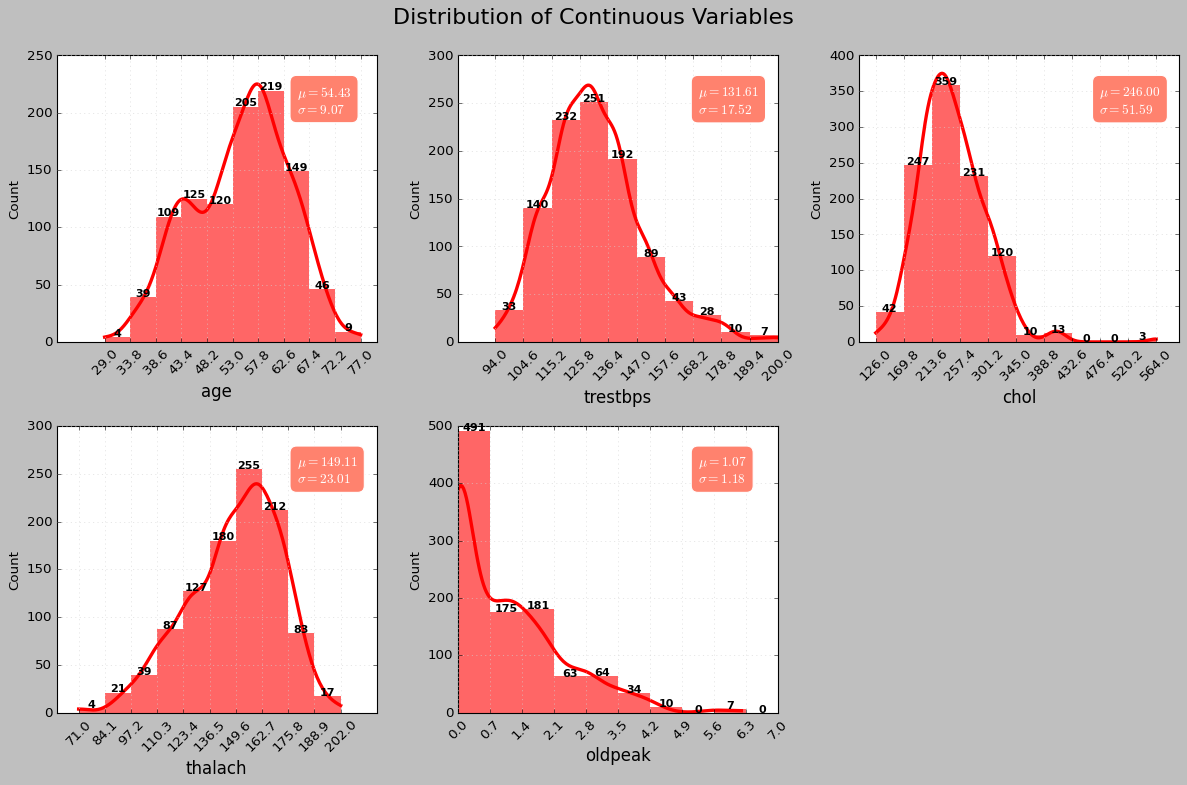

In [ ]:
# Filter out continuous features for the univariate analysis
data_continuous = data[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(data_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(data_continuous[col],
                                     range=(np.floor(data_continuous[col].min()), np.ceil(data_continuous[col].max())))

    graph = sns.histplot(data=data_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % data_continuous[col].mean(),
        r'$\sigma=%.2f$' % data_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

**Categorical Variables Univariate Analysis**

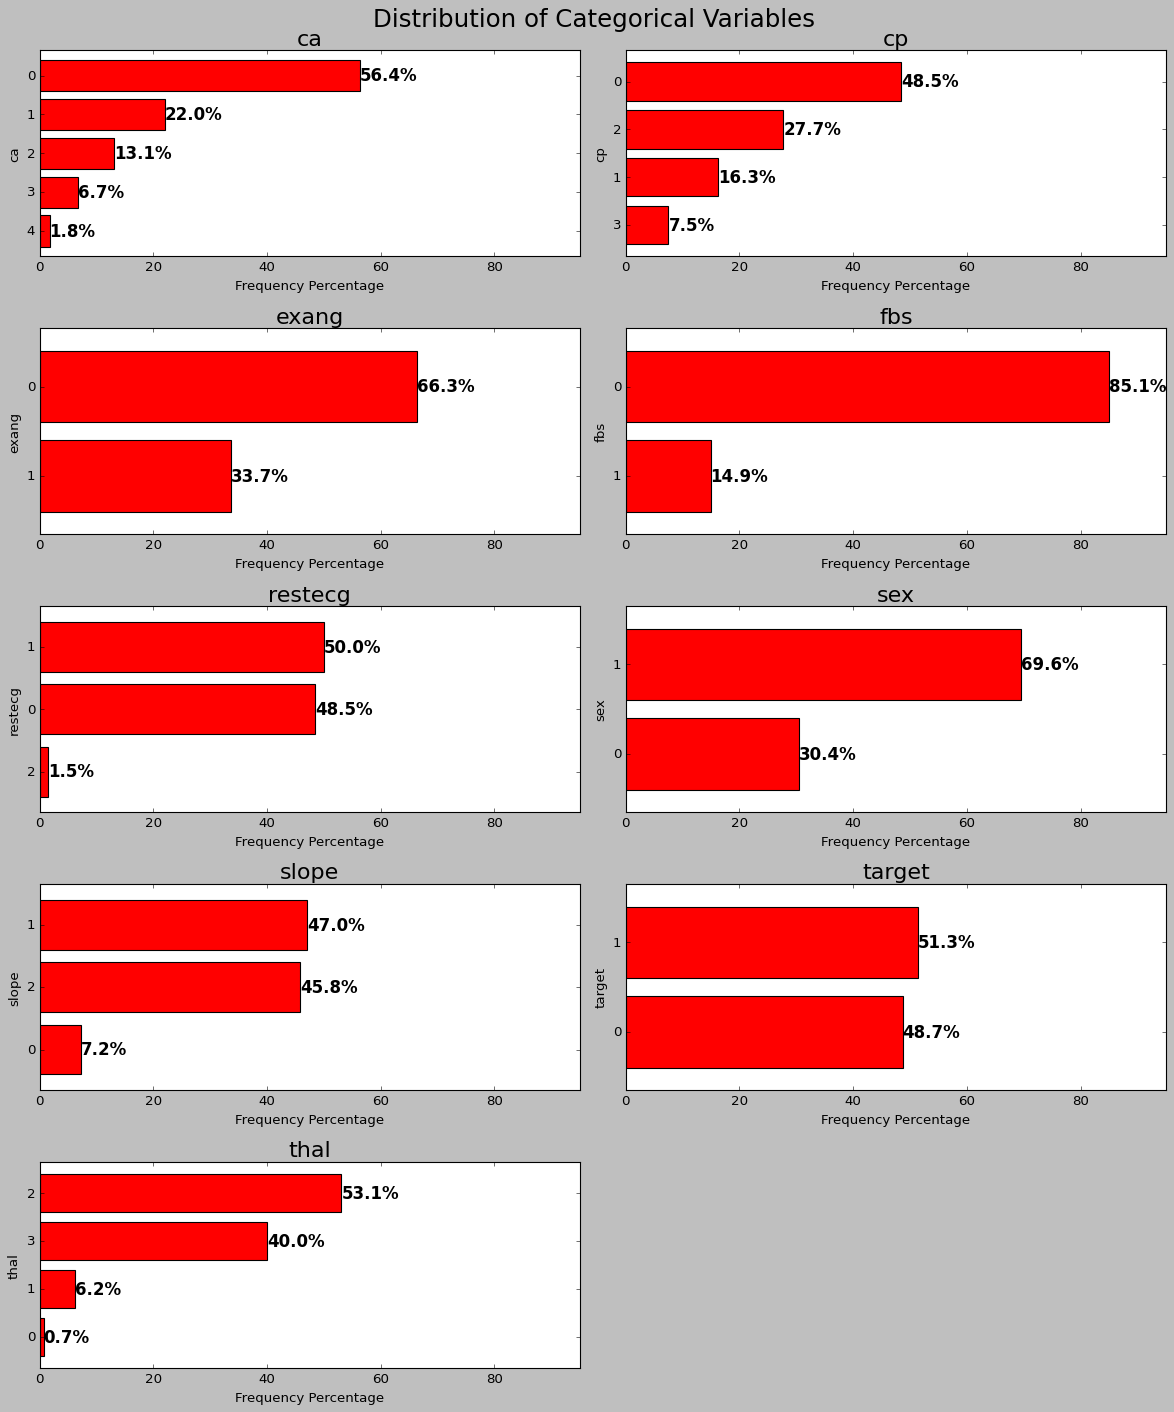

In [ ]:
# Filter out categorical features for the univariate analysis
categorical_features = data.columns.difference(continuous_features)
data_categorical = data[categorical_features]
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Calculate frequency percentages
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

**Numerical Features vs Target**

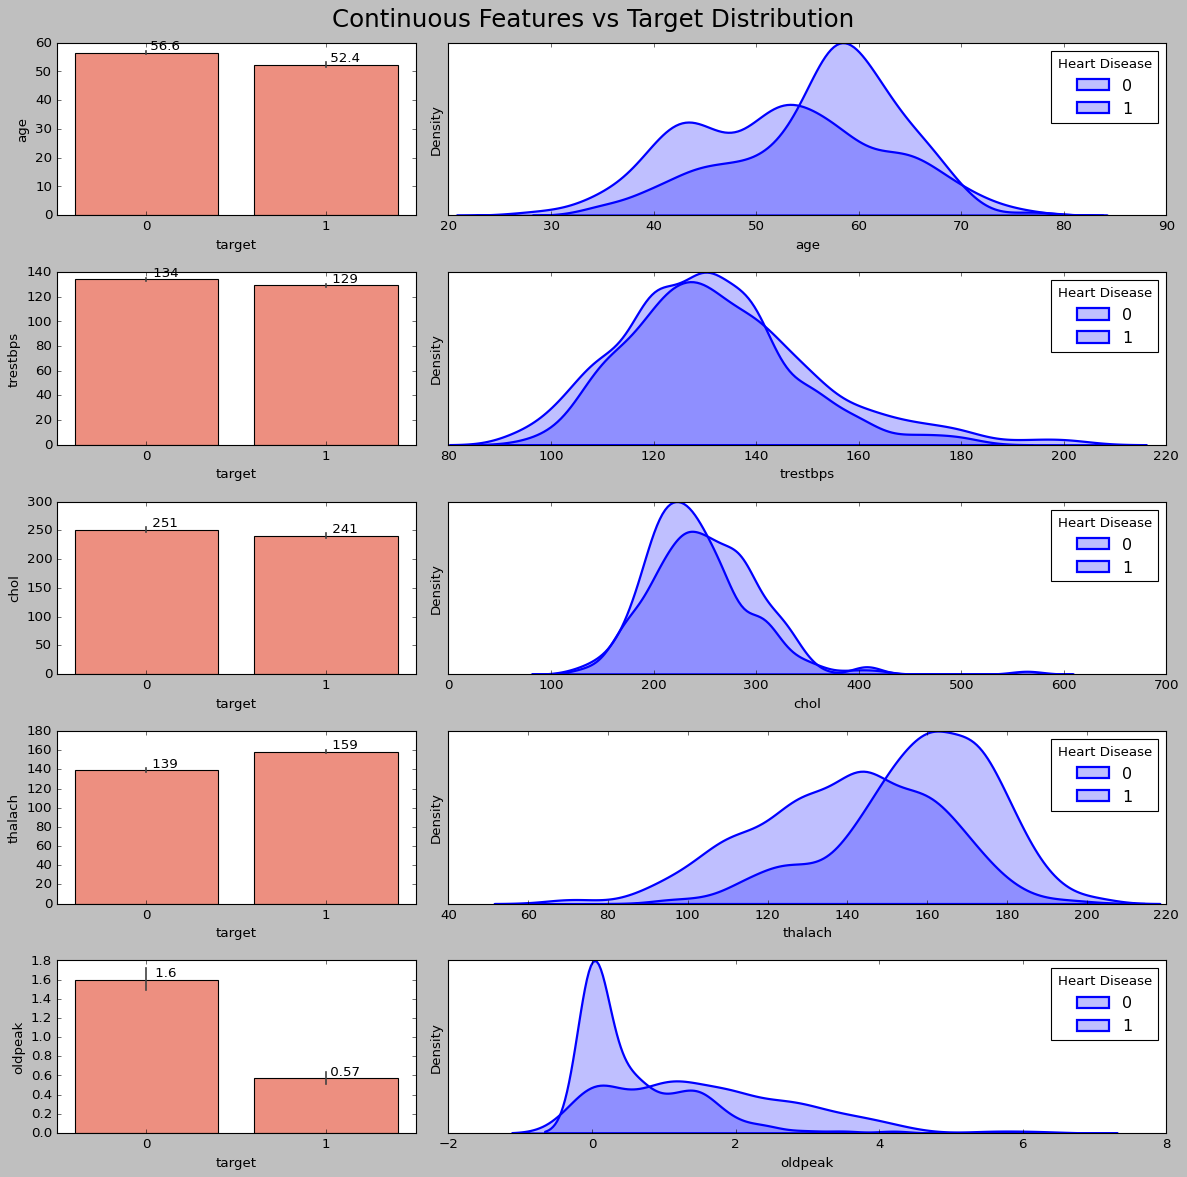

In [ ]:
# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=data, x="target", y=col, ax=ax[i,0])

    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=data[data["target"]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=data[data["target"]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')

    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()


**Categorical Features vs Target**

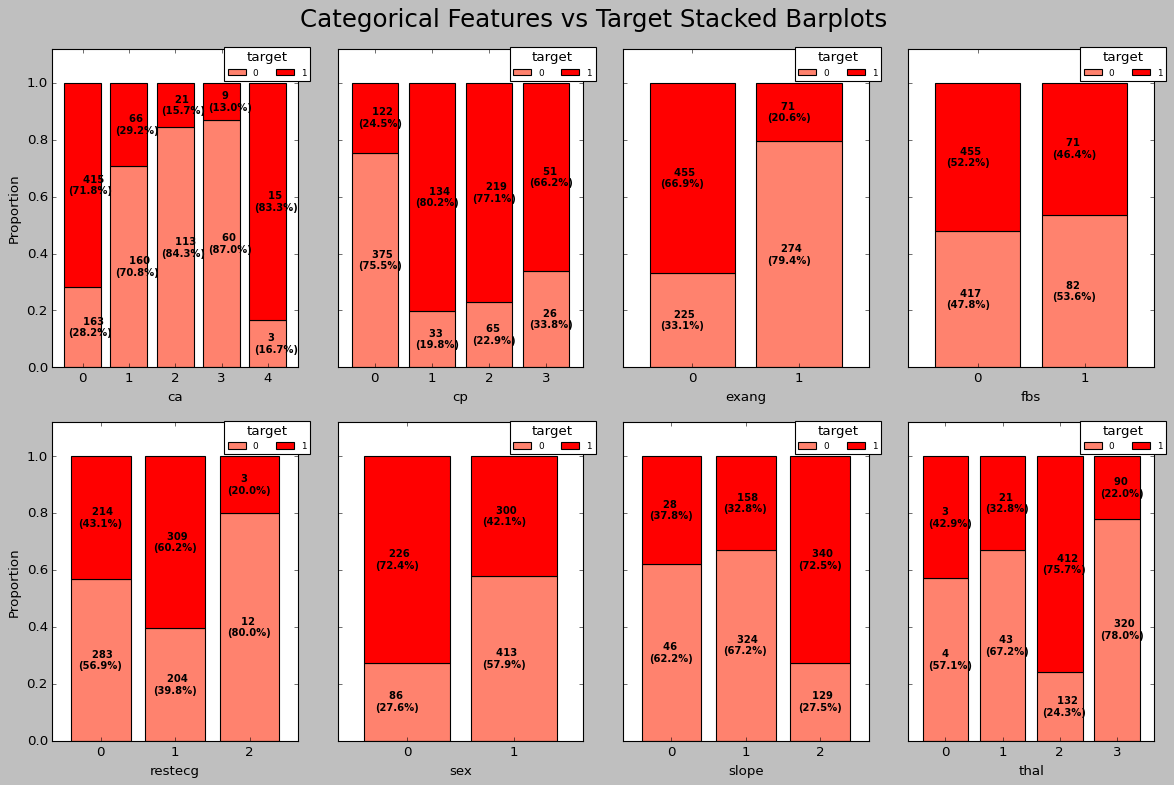

In [ ]:
from matplotlib.colors import ListedColormap
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i,col in enumerate(categorical_features):

    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=data[col], columns=data['target'])

    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=data[col], columns=data['target'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])

    # Plot stacked bar charts
    x, y = i//4, i%4
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=9, fontweight="bold")

    # Add legend
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)


plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()


# FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP

(14.5, -0.5)

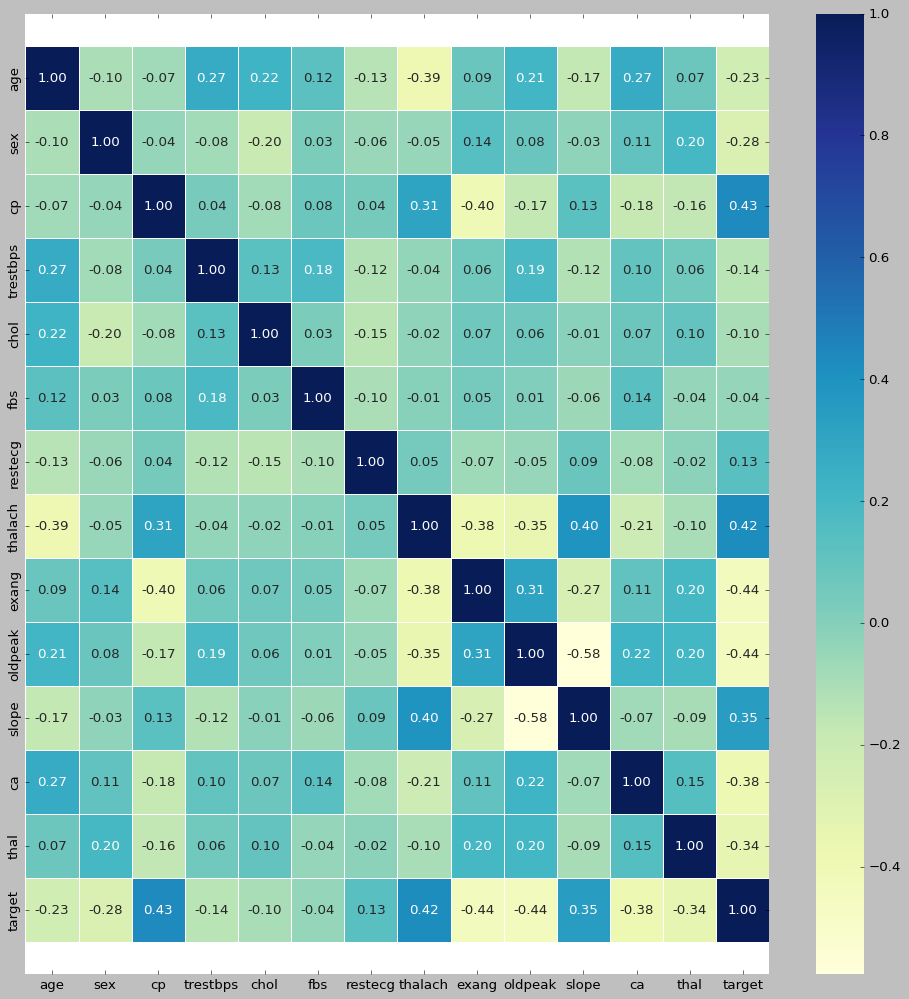

In [ ]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**Data Preprocessing**

**Irrelevant Features Removal**

**Missing Value Treatment**

In [ ]:
# Check for missing values in the dataset
data.isnull().sum().sum()

0

**Outlier Treatment**

In [ ]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
Q1 = data[continuous_features].quantile(0.25)
Q3 = data[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((data[continuous_features] < (Q1 - 1.5 * IQR)) | (data[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified


age          0
trestbps    30
chol        16
thalach      4
oldpeak      7
dtype: int64

**Categorical Features Encoding**

In [ ]:
# Implementing one-hot encoding on the specified categorical features
data_encoded = pd.get_dummies(data, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    data_encoded[feature] = data_encoded[feature].astype(int)

data_encoded.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [ ]:
# Displaying the resulting DataFrame after one-hot encoding
data_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,2,0,False,False,False,True,False,False,False,True
1,53,1,140,203,1,155,1,3.1,0,0,0,False,False,False,False,False,False,False,True
2,70,1,145,174,0,125,1,2.6,0,0,0,False,False,False,True,False,False,False,True
3,61,1,148,203,0,161,0,0.0,2,1,0,False,False,False,True,False,False,False,True
4,62,0,138,294,1,106,0,1.9,1,3,0,False,False,False,True,False,False,True,False


# creating dummy variables

In [ ]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
print(data.columns)
print(dataset.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


# model building

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [ ]:

from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# logistic regression

In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))


[0 1]
[0 1]


In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.907692    0.885204  0.895397    0.896448      0.895868
recall       0.867647    0.920424  0.895397    0.894036      0.895397
f1-score     0.887218    0.902471  0.895397    0.894844      0.895238
support    340.000000  377.000000  0.895397  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[295  45]
 [ 30 347]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.850340    0.788820  0.818182    0.819580      0.820579
recall       0.786164    0.852349  0.818182    0.819256      0.818182
f1-score     0.816993    0.819355  0.818182    0.818174      0.818136
support    159.000000  149.000000  0.818182  308.000000    308.

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,89.539749,81.818182


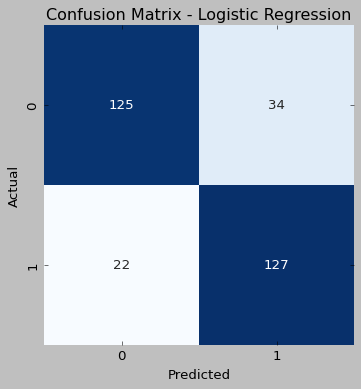

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, y_train, X_test, y_test

# Train Logistic Regression model
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, lr_clf.predict(X_test))

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have already defined X_train, y_train, X_test, y_test

# Train Logistic Regression model
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

# Calculate accuracy scores
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100

# Print classification report
class_report = classification_report(y_test, lr_clf.predict(X_test))
print("Classification Report - Logistic Regression:")
print(class_report)

# Create a DataFrame for the results
results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Display the results DataFrame
print(results_df)


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       159
           1       0.79      0.85      0.82       149

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308

                 Model  Training Accuracy %  Testing Accuracy %
0  Logistic Regression            89.539749           81.818182


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Sample classification report (replace this with your actual classification report)
report_str = """
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       159
           1       0.79      0.85      0.82       149

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308
"""

# Convert the classification report string to a DataFrame
def classification_report_to_df(report_str):
    report_data = []

    # Split the report into lines
    lines = report_str.strip().split('\n')

    # Extract data from each line
    for line in lines[2:-3]:
        row = line.split()
        if len(row) >= 5 and row[0].isdigit():
            class_name = row[0]
            precision = float(row[1])
            recall = float(row[2])
            f1_score = float(row[3])
            support = int(row[4])
            report_data.append([class_name, precision, recall, f1_score, support])

    # Extract data from macro avg and weighted avg lines
    for line in lines[-2:]:
        row = line.split()
        class_name = row[1]  # Use the second element as the class name
        precision = float(row[2])
        recall = float(row[3])
        f1_score = float(row[4])
        support = float('nan')  # Set support to NaN for macro avg and weighted avg
        report_data.append([class_name, precision, recall, f1_score, support])

    # Convert the list to a DataFrame
    df = pd.DataFrame(report_data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
    return df

# Use the function to convert the classification report to DataFrame
classification_report_df = classification_report_to_df(report_str)

# Display the DataFrame
classification_report_df


,Class,Precision,Recall,F1-Score,Support
0,0,0.85,0.79,0.82,159.0
1,1,0.79,0.85,0.82,149.0
2,avg,0.82,0.82,0.82,NaN
3,avg,0.82,0.82,0.82,NaN


# K-nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.77%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.914454    0.920635  0.917713    0.917545      0.917704
recall       0.911765    0.923077  0.917713    0.917421      0.917713
f1-score     0.913108    0.921854  0.917713    0.917481      0.917707
support    340.000000  377.000000  0.917713  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[310  30]
 [ 29 348]]

Test Result:
Accuracy Score: 81.82%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.860140    0.781818  0.818182    0.820979      0.822250
recall       0.773585    0.865772  0.818182    0.819678      0.818182
f1-score     0.814570    0.821656  0.818182    0.818113      0.817998
support    159.000000  149.000000  0.818182  308.000000    308.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Assuming you have already defined X_train, y_train, X_test, y_test

# Train K-nearest neighbors model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Calculate accuracy scores
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100

# Print classification report
class_report = classification_report(y_test, knn_clf.predict(X_test))
print("Classification Report - K-nearest neighbors:")
print(class_report)

# Create a DataFrame for the results
results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]],
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Display the results DataFrame
results_df_2


Classification Report - K-nearest neighbors:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       159
           1       0.78      0.87      0.82       149

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308



,Model,Training Accuracy %,Testing Accuracy %
0,K-nearest neighbors,91.771269,81.818182


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Sample classification report (replace this with your actual classification report)
report_str = """
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       159
           1       0.78      0.87      0.82       149

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308
"""

# Convert the classification report string to a DataFrame
def classification_report_to_df(report_str):
    report_data = []

    # Find the start and end indices for the table
    start_idx = report_str.find("precision")
    end_idx = report_str.find("accuracy")

    # Extract the relevant part of the report
    report_table = report_str[start_idx:end_idx].strip()

    # Split the table into lines
    lines = report_table.split('\n')

    for line in lines[1:]:
        row = line.split()
        if len(row) >= 5:
            class_name = row[0]
            precision = float(row[1])
            recall = float(row[2])
            f1_score = float(row[3])
            support = int(row[4])
            report_data.append([class_name, precision, recall, f1_score, support])

    # Convert the list to a DataFrame
    df = pd.DataFrame(report_data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
    return df

# Use the function to convert the classification report to DataFrame
classification_report_df = classification_report_to_df(report_str)

# Display the DataFrame
classification_report_df


,Class,Precision,Recall,F1-Score,Support
0,0,0.86,0.77,0.81,159
1,1,0.78,0.87,0.82,149


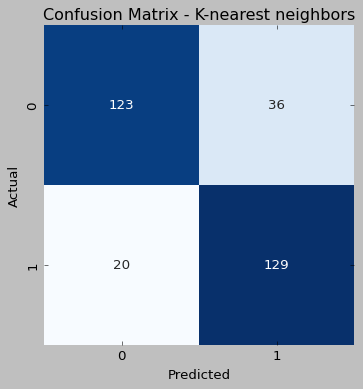

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, y_train, X_test, y_test

# Train K-nearest neighbors model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, knn_clf.predict(X_test))

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - K-nearest neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Support vector machine

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.40%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.969419    0.941026  0.953975    0.955222      0.954490
recall       0.932353    0.973475  0.953975    0.952914      0.953975
f1-score     0.950525    0.956975  0.953975    0.953750      0.953916
support    340.000000  377.000000  0.953975  717.000000    717.000000
_______________________________________________
Confusion Matrix: 
 [[317  23]
 [ 10 367]]

Test Result:
Accuracy Score: 90.26%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.944828    0.865031  0.902597    0.904929      0.906225
recall       0.861635    0.946309  0.902597    0.903972      0.902597
f1-score     0.901316    0.903846  0.902597    0.902581      0.902540
support    159.000000  149.000000  0.902597  308.000000    308.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Assuming you have already defined X_train, y_train, X_test, y_test

# Train Support Vector Machine (SVM) model
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

# Calculate accuracy scores
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100

# Print classification report
class_report = classification_report(y_test, svm_clf.predict(X_test))
print("Classification Report - Support Vector Machine:")
print(class_report)

# Create a DataFrame for the results
results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]],
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Display the results DataFrame
print(results_df_2)


Classification Report - Support Vector Machine:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       159
           1       0.87      0.95      0.90       149

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.91      0.90      0.90       308

                    Model  Training Accuracy %  Testing Accuracy %
0  Support Vector Machine             95.39749            90.25974


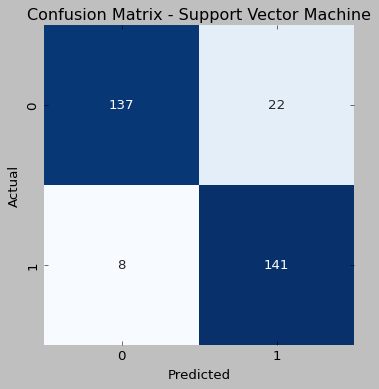

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, y_train, X_test, y_test

# Train Support Vector Machine (SVM) model
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, svm_clf.predict(X_test))

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pandas as pd

# Sample classification report (replace this with your actual classification report)
report_str = """
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       159
           1       0.87      0.95      0.90       149

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.91      0.90      0.90       308
"""

# Convert the classification report string to a DataFrame
def classification_report_to_df(report_str):
    report_data = []

    # Split the report into lines
    lines = report_str.strip().split('\n')

    # Extract data from each line
    for line in lines[2:-3]:
        row = line.split()
        if len(row) >= 5 and row[0].isdigit():
            class_name = row[0]
            precision = float(row[1])
            recall = float(row[2])
            f1_score = float(row[3])
            support = int(row[4])
            report_data.append([class_name, precision, recall, f1_score, support])

    # Convert the list to a DataFrame
    df = pd.DataFrame(report_data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
    return df

# Use the function to convert the classification report to DataFrame
classification_report_df = classification_report_to_df(report_str)
classification_report_df

,Class,Precision,Recall,F1-Score,Support
0,0,0.94,0.86,0.9,159
1,1,0.87,0.95,0.9,149


# decision tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    340.0  377.0       1.0      717.0         717.0
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.946429    1.000000  0.970779    0.973214      0.972345
recall       1.000000    0.939597  0.970779    0.969799      0.970779
f1-score     0.972477    0.968858  0.970779    0.970668      0.970726
support    159.000000  149.000000  0.970779  308.000000    308.000000
_______________________________________________

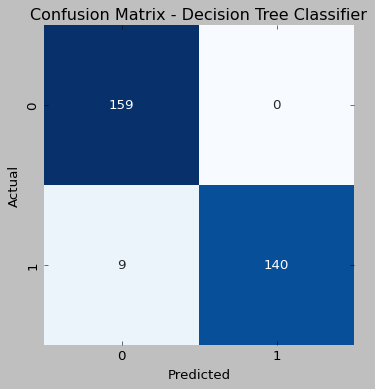

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, y_train, X_test, y_test

# Train Decision Tree Classifier model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, tree_clf.predict(X_test))

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Assuming you have already defined X_train, y_train, X_test, y_test

# Train Decision Tree Classifier model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Calculate accuracy scores
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100

# Print classification report
class_report = classification_report(y_test, tree_clf.predict(X_test))
print("Classification Report - Decision Tree Classifier:")
print(class_report)

# Create a DataFrame for the results
results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]],
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Display the results DataFrame
print(results_df_2)


Classification Report - Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308

                      Model  Training Accuracy %  Testing Accuracy %
0  Decision Tree Classifier                100.0           97.077922


In [ ]:
import pandas as pd

# Sample classification report (replace this with your actual classification report)
report_str = """
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308
"""

# Convert the classification report string to a DataFrame
def classification_report_to_df(report_str):
    report_data = []

    # Split the report into lines
    lines = report_str.strip().split('\n')

    # Extract data from each line
    for line in lines[2:-3]:
        row = line.split()
        if len(row) >= 5 and row[0].isdigit():
            class_name = row[0]
            precision = float(row[1])
            recall = float(row[2])
            f1_score = float(row[3])
            support = int(row[4])
            report_data.append([class_name, precision, recall, f1_score, support])

    # Convert the list to a DataFrame
    df = pd.DataFrame(report_data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
    return df

# Use the function to convert the classification report to DataFrame
classification_report_df = classification_report_to_df(report_str)
classification_report_df


,Class,Precision,Recall,F1-Score,Support
0,0,0.95,1.00,0.97,159
1,1,1.00,0.94,0.97,149


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    340.0  377.0       1.0      717.0         717.0
_______________________________________________
Confusion Matrix: 
 [[340   0]
 [  0 377]]

Test Result:
Accuracy Score: 98.05%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.963636    1.000000  0.980519    0.981818      0.981228
recall       1.000000    0.959732  0.980519    0.979866      0.980519
f1-score     0.981481    0.979452  0.980519    0.980467      0.980500
support    159.000000  149.000000  0.980519  308.000000    308.000000
_______________________________________________

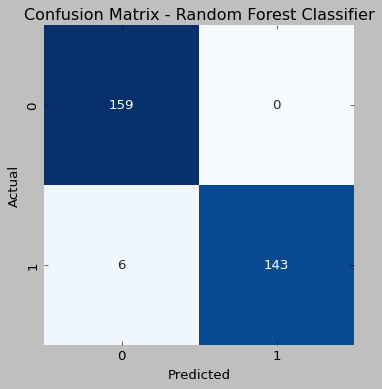

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already defined X_train, y_train, X_test, y_test

# Train Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, rf_clf.predict(X_test))

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Assuming you have already defined X_train, y_train, X_test, y_test

# Train Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

# Calculate accuracy scores
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100

# Print classification report
class_report = classification_report(y_test, rf_clf.predict(X_test))
print("Classification Report - Random Forest Classifier:")
print(class_report)

# Create a DataFrame for the results
results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]],
                            columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])

# Display the results DataFrame
print(results_df_2)


Classification Report - Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

                      Model  Training Accuracy %  Testing Accuracy %
0  Random Forest Classifier                100.0           98.051948


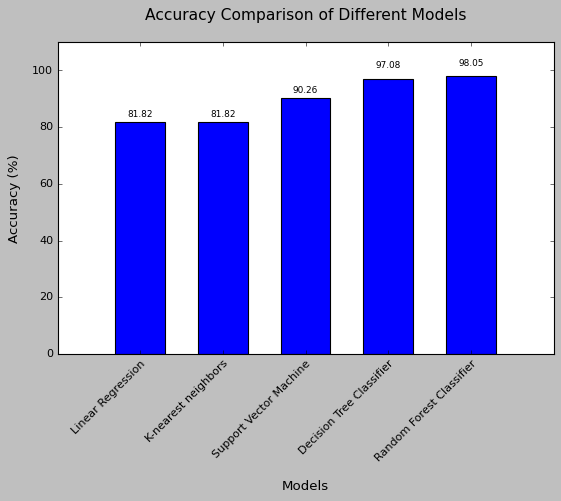

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores for each algorithm (replace with your actual scores)
accuracy_scores = [81.818182, 81.818182, 90.259740, 97.077922, 98.051948]

# Models' names
model_names = ['Linear Regression', 'K-nearest neighbors', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier']

# Create a smaller bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(np.arange(len(accuracy_scores)), accuracy_scores, color='#0000FF', width=0.6)  # Light Blue color

# Set y-axis limit to percentage scale (0-100%)
plt.ylim(0, 110)  # Increased upper limit for better spacing

# Set x and y axis ticks color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# X-axis and Y-axis labels in black color
plt.xlabel('Models', color='black', fontsize=12, labelpad=15)  # Increased labelpad for spacing
plt.ylabel('Accuracy (%)', color='black', fontsize=12, labelpad=10)  # Increased labelpad for spacing

# X and Y-axis tick labels in black color
plt.xticks(np.arange(len(accuracy_scores)), model_names, rotation=45, ha='right', rotation_mode='anchor', fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# Add accuracy values on top of each bar with adjusted position
for i, v in enumerate(accuracy_scores):
    ax.text(i, v + 1 if v < 97 else v + 3, str(round(v, 2)), ha='center', va='bottom', color='black', fontsize=8)

# Title in normal black color with increased space
plt.title('Accuracy Comparison of Different Models', color='black', fontsize=14, pad=20)

# Adjust space between the plot and the top border
plt.subplots_adjust(top=0.88)

# Show the bar chart
plt.show()


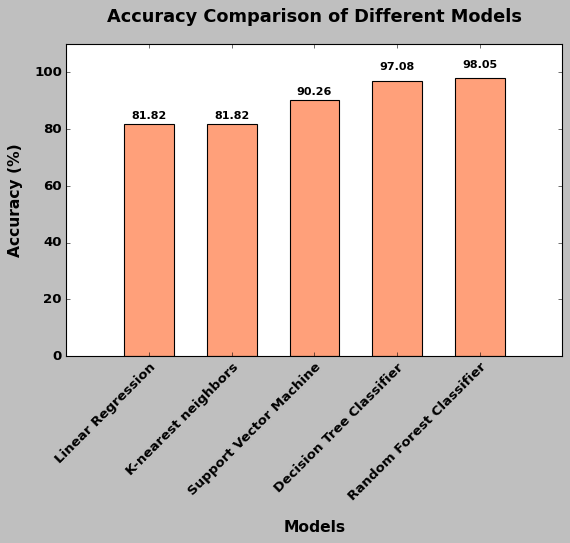

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores for each algorithm (replace with your actual scores)
accuracy_scores = [81.818182, 81.818182, 90.259740, 97.077922, 98.051948]

# Models' names
model_names = ['Linear Regression', 'K-nearest neighbors', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier']

# Create a smaller bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(np.arange(len(accuracy_scores)), accuracy_scores, color='#FFA07A', width=0.6)  # Light Salmon color

# Set y-axis limit to percentage scale (0-100%)
plt.ylim(0, 110)  # Increased upper limit for better spacing

# Set x and y axis ticks color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# X-axis and Y-axis labels in black color, bold, and increased font size
plt.xlabel('Models', color='black', fontsize=14, labelpad=15, fontweight='bold')  # Increased labelpad for spacing
plt.ylabel('Accuracy (%)', color='black', fontsize=14, labelpad=10, fontweight='bold')  # Increased labelpad for spacing

# X and Y-axis tick labels in black color, bold, and increased font size
plt.xticks(np.arange(len(accuracy_scores)), model_names, rotation=45, ha='right', rotation_mode='anchor', fontsize=12, color='black', fontweight='bold')
plt.yticks(fontsize=12, color='black', fontweight='bold')

# Add accuracy values on top of each bar with adjusted position
for i, v in enumerate(accuracy_scores):
    ax.text(i, v + 1 if v < 97 else v + 3, str(round(v, 2)), ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Title in normal black color with increased space, bold, and increased font size
plt.title('Accuracy Comparison of Different Models', color='black', fontsize=16, pad=20, fontweight='bold')

# Adjust space between the plot and the top border
plt.subplots_adjust(top=0.88)

# Show the bar chart
plt.show()


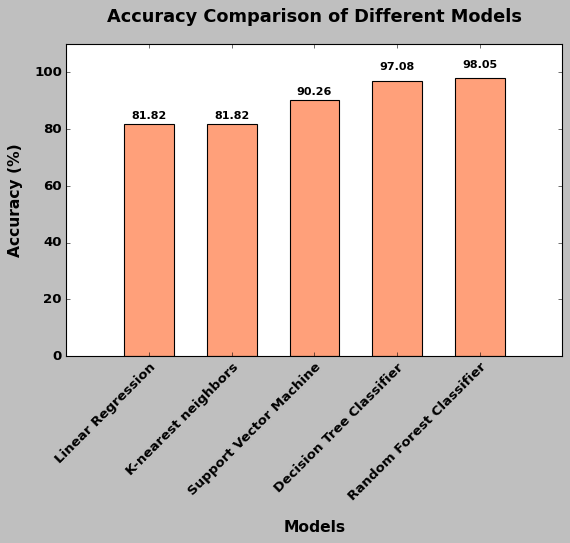

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores for each algorithm (replace with your actual scores)
accuracy_scores = [81.818182, 81.818182, 90.259740, 97.077922, 98.051948]

# Models' names
model_names = ['Linear Regression', 'K-nearest neighbors', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier']

# Create a smaller bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(np.arange(len(accuracy_scores)), accuracy_scores, color='#FFA07A', width=0.6)  # Light Salmon color

# Set y-axis limit to percentage scale (0-100%)
plt.ylim(0, 110)  # Increased upper limit for better spacing

# Set x and y axis ticks color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# X-axis and Y-axis labels in black color, bold, and increased font size
plt.xlabel('Models', color='black', fontsize=14, labelpad=15, fontweight='bold')  # Increased labelpad for spacing
plt.ylabel('Accuracy (%)', color='black', fontsize=14, labelpad=10, fontweight='bold')  # Increased labelpad for spacing

# X and Y-axis tick labels in black color, bold, and increased font size
plt.xticks(np.arange(len(accuracy_scores)), model_names, rotation=45, ha='right', rotation_mode='anchor', fontsize=12, color='black', fontweight='bold')
plt.yticks(fontsize=12, color='black', fontweight='bold')

# Add accuracy values on top of each bar with adjusted position
for i, v in enumerate(accuracy_scores):
    ax.text(i, v + 1 if v < 97 else v + 3, str(round(v, 2)), ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Title in normal black color with increased space, bold, and increased font size
plt.title('Accuracy Comparison of Different Models', color='black', fontsize=16, pad=20, fontweight='bold')

# Adjust space between the plot and the top border
plt.subplots_adjust(top=0.88)

# Show the bar chart
plt.show()


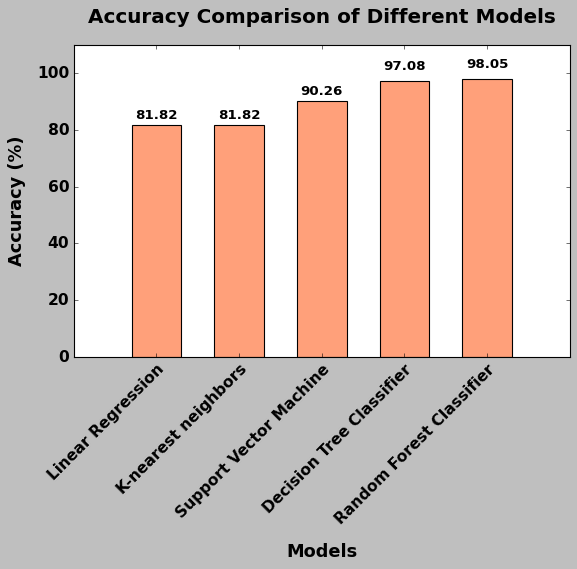

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores for each algorithm (replace with your actual scores)
accuracy_scores = [81.818182, 81.818182, 90.259740, 97.077922, 98.051948]

# Models' names
model_names = ['Linear Regression', 'K-nearest neighbors', 'Support Vector Machine', 'Decision Tree Classifier', 'Random Forest Classifier']

# Create a smaller bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(np.arange(len(accuracy_scores)), accuracy_scores, color='#FFA07A', width=0.6)  # Light Salmon color

# Set y-axis limit to percentage scale (0-100%)
plt.ylim(0, 110)  # Increased upper limit for better spacing

# Set x and y axis ticks color to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

# X-axis and Y-axis labels in black color, bold, and increased font size
plt.xlabel('Models', color='black', fontsize=16, labelpad=15, fontweight='bold')  # Increased labelpad for spacing
plt.ylabel('Accuracy (%)', color='black', fontsize=16, labelpad=10, fontweight='bold')  # Increased labelpad for spacing

# X and Y-axis tick labels in black color, bold, and increased font size
plt.xticks(np.arange(len(accuracy_scores)), model_names, rotation=45, ha='right', rotation_mode='anchor', fontsize=14, color='black', fontweight='bold')
plt.yticks(fontsize=14, color='black', fontweight='bold')

# Add accuracy values on top of each bar with adjusted position
for i, v in enumerate(accuracy_scores):
    ax.text(i, v + 1 if v < 97 else v + 3, str(round(v, 2)), ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

# Title in normal black color with increased space, bold, and increased font size
plt.title('Accuracy Comparison of Different Models', color='black', fontsize=18, pad=20, fontweight='bold')

# Adjust space between the plot and the top border
plt.subplots_adjust(top=0.88)

# Show the bar chart
plt.show()


# conclusion
The project involved analysis of the heart disease patient dataset with proper data processing. Then, 5 models were trained
and tested with maximum scores as follows:
1       Logistic Regression                       81.818182
2       K-nearest neighbors                       81.818182
3  Decision Tree Classifier                      97.077922
4  Random Forest Classifier                      98.051948
5    Support Vector Machine                       90.259740
    
Random Forest Classifier scored the best score of 98%.

In [ ]:
pip install joblib

In [ ]:
import joblib
joblib.dump(rf_clf, 'cad_model.pkl')

['cad_model.pkl']